## Import necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Downloads\data\demo_data\9.random.csv", header = None)

## Performing little bit of EDA

In [4]:
df.columns = ['feature_1', 'feature_2','output'] #changing the columns name to more readable ones.

In [5]:
df.head()

,feature_1,feature_2,output
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [6]:
df.isna().sum() # no missing values

feature_1    0
feature_2    0
output       0
dtype: int64

In [7]:
df['output'].value_counts(normalize=True) # there is no imbalance

1.0    0.505
0.0    0.495
Name: output, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  400 non-null    float64
 1   feature_2  400 non-null    float64
 2   output     400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [9]:
df.describe(include='all')

,feature_1,feature_2,output
count,400.000000,400.000000,400.000000
mean,0.473766,0.678849,0.505000
std,0.303491,0.277019,0.500601
min,-0.206000,0.094500,0.000000
25%,0.247000,0.429750,0.000000
50%,0.488000,0.692500,1.000000
75%,0.726500,0.922250,1.000000
max,1.100000,1.240000,1.000000


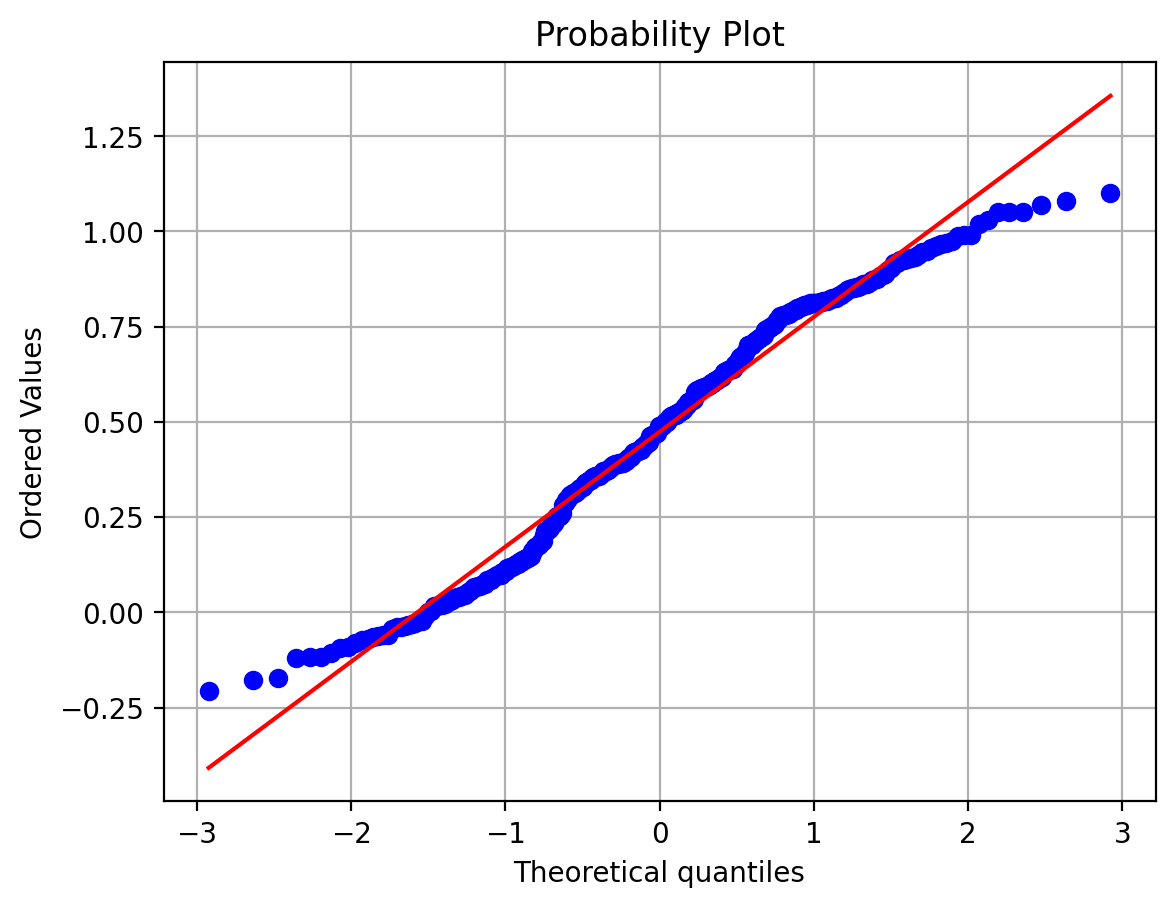

In [10]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_1'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_1 is moderately normal distributed as some of the points are not lying on the line.

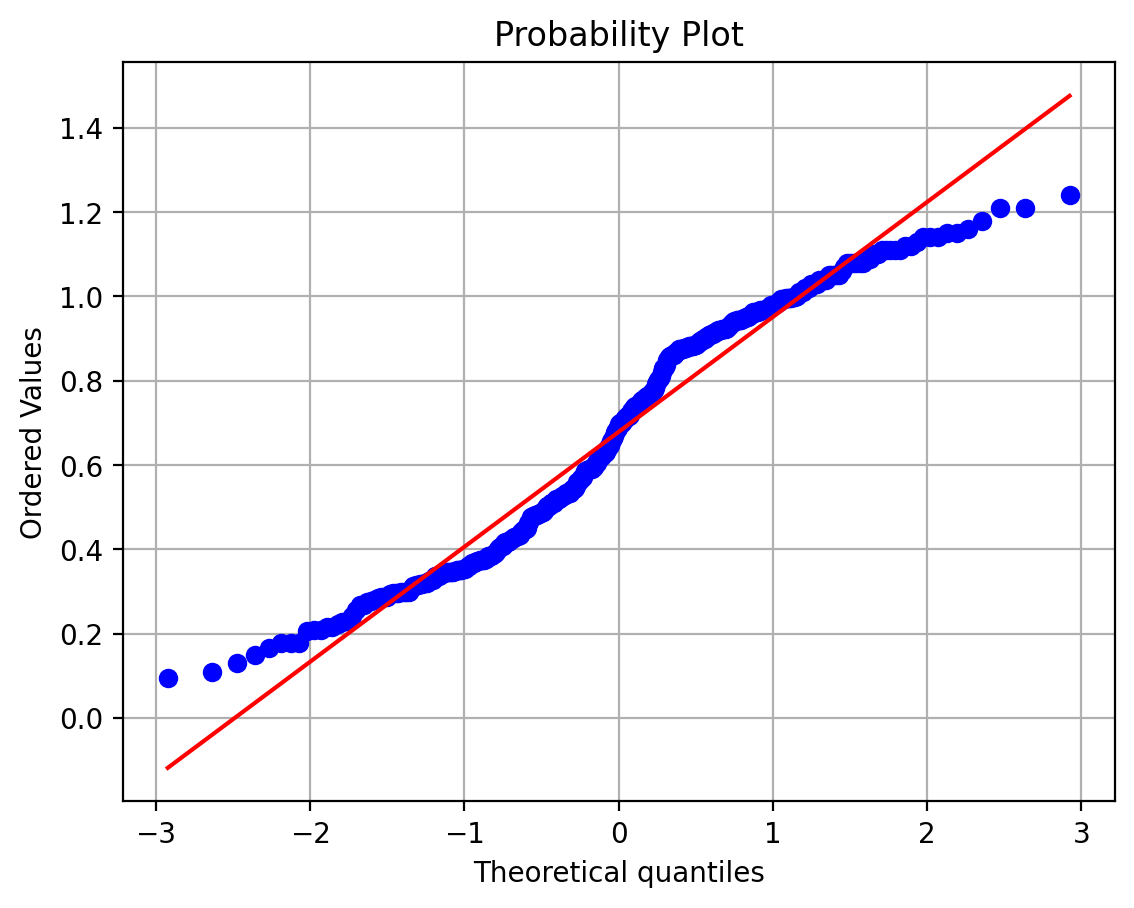

In [11]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_2'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_2  is moderately normal distributed as some of the points are not lying on the line.

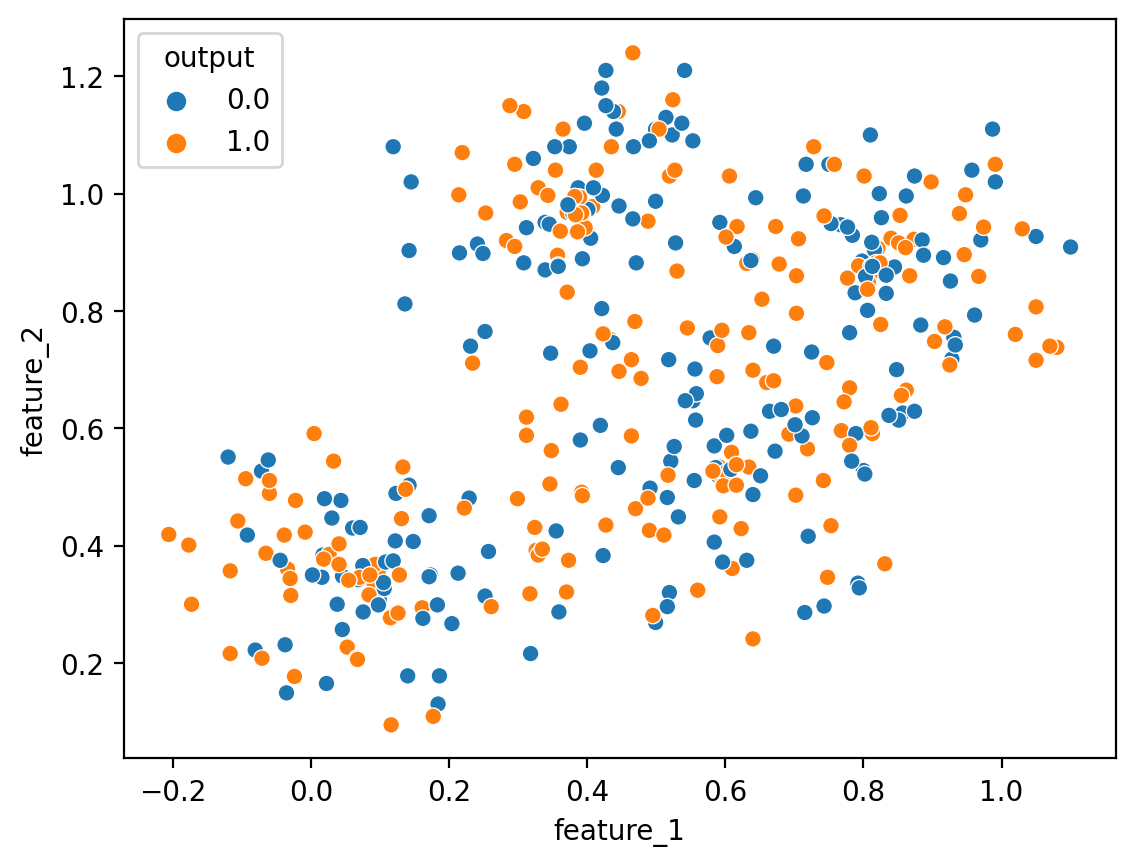

In [12]:
sns.scatterplot(x = 'feature_1',y='feature_2', hue = 'output', data = df);

### Intution
* clearly we can observe that the data is non-linear
* We can observe that the data points are randomly spread accross the surface

## Segregation of input and output features

In [72]:
X = df[['feature_1','feature_2']]
y=df['output']

## Spliting the data into train and test

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

## Data preprocessing of train and test data

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trns=sc.fit_transform(X_train)

In [75]:
X_test_trns = sc.transform(X_test)

## Building the Architecture

In [76]:
model = Sequential()
model.add(Dense(10,activation='relu', kernel_initializer = 'he_uniform',input_dim = 2))
model.add(Dense(9,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(8,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(7,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(6,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(4,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                30        
                                                                 
 dense_37 (Dense)            (None, 9)                 99        
                                                                 
 dense_38 (Dense)            (None, 8)                 80        
                                                                 
 dense_39 (Dense)            (None, 7)                 63        
                                                                 
 dense_40 (Dense)            (None, 6)                 48        
                                                                 
 dense_41 (Dense)            (None, 4)                 28        
                                                                 
 dense_42 (Dense)            (None, 3)                

## Compiling the Architecture & Model Creation

In [78]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [79]:
history = model.fit(X_train_trns,y_train,epochs =300,validation_split = 0.2 )

Epoch 1/300
8/8 [==============================] - 2s 36ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6930 - val_accuracy: 0.5469
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6930 - val_accuracy: 0.5469
Epoch 3/300
8/8 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.5469
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.5469
Epoch 5/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.4531
Epoch 6/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4414 - val_loss: 0.6932 - val_accuracy: 0.4531
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4531
Epoch 8/300
8/8 [=========

## Prediction Phase

In [64]:
Y_cap = model.predict(X_test_trns)

3/3 [==============================] - 0s 0s/step


In [65]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [66]:
Y_cap_f

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

## Model Evaluation

In [67]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.5125

## Ploting the Best Decision Surface Region

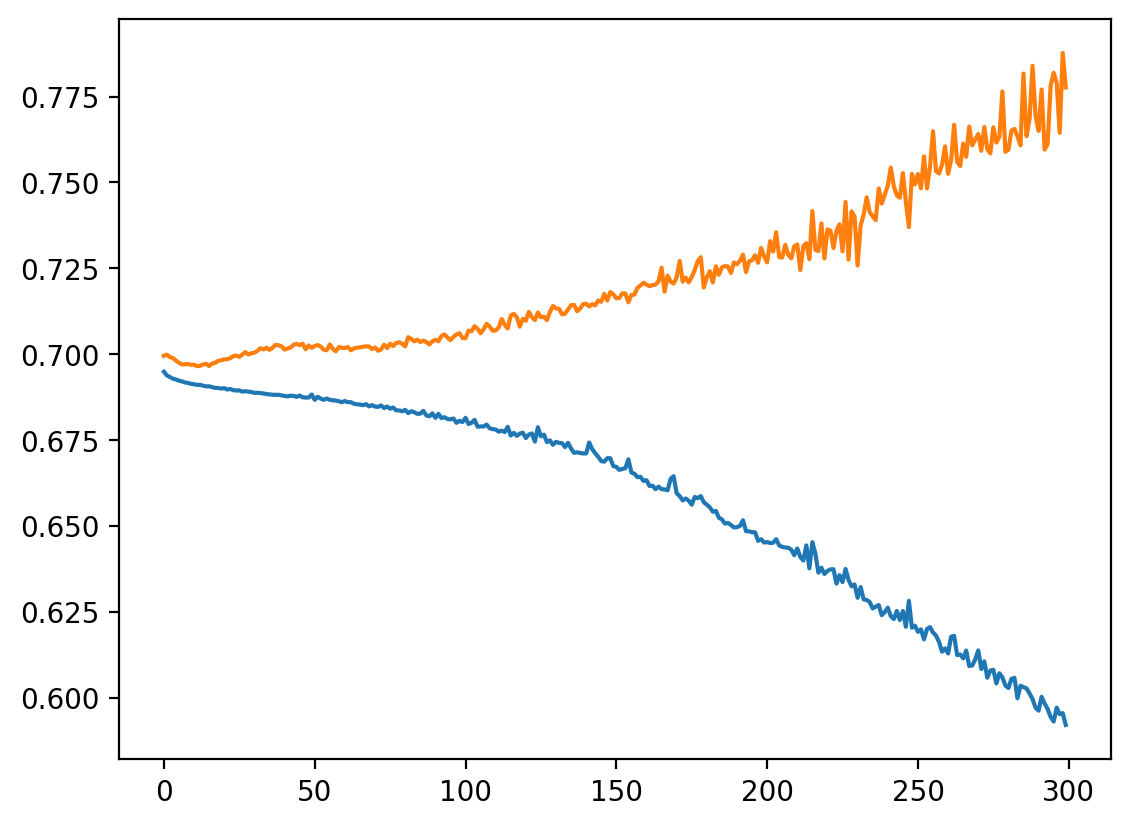

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [69]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 1ms/step


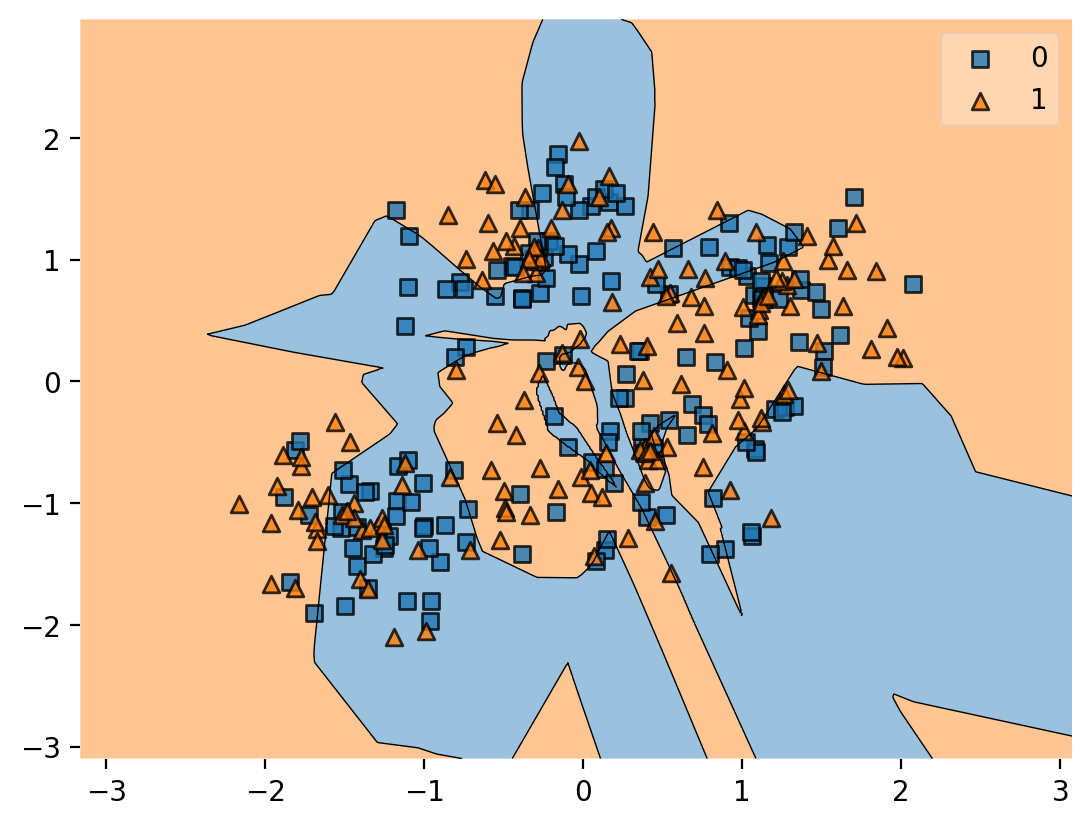

In [70]:
plot_decision_regions(X_train_trns, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 14s 1ms/step


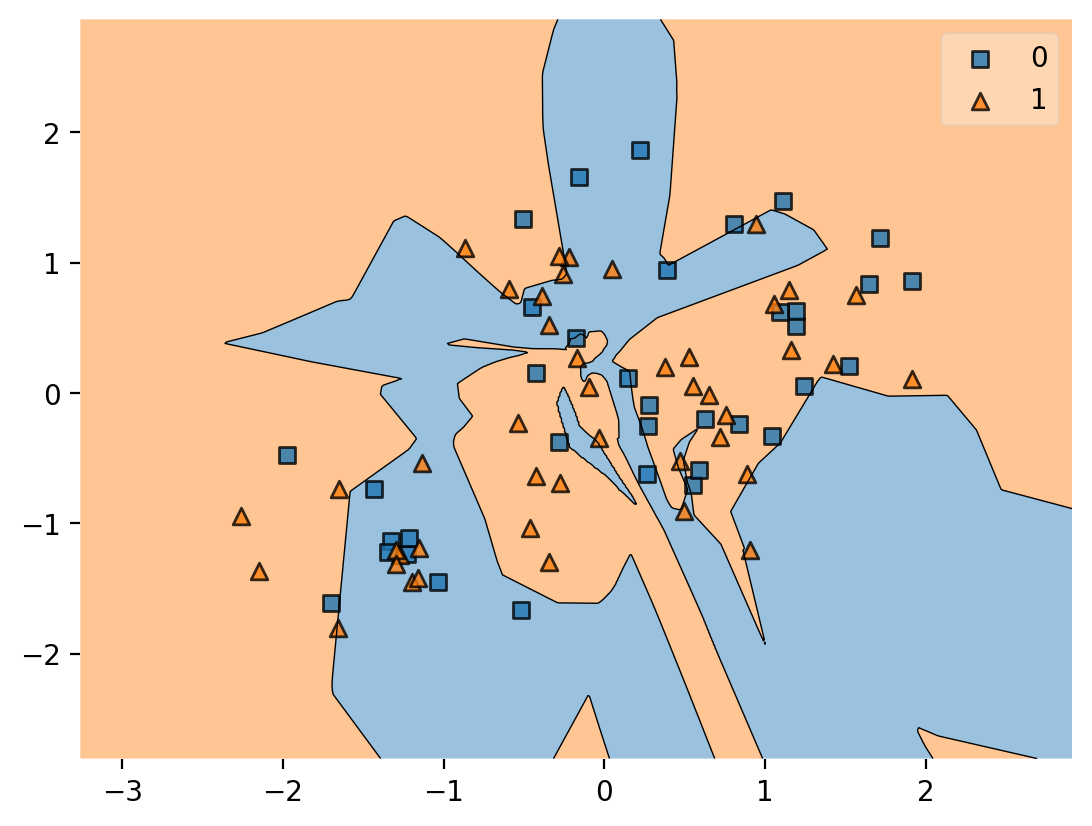

In [71]:
plot_decision_regions(X_test_trns, y_test.values.astype(int), clf = model);